# First part: Comparison of classifiers on simulated data

In [1]:
from sklearn.datasets import make_moons, make_circles, make_classification, make_blobs
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier #Multilayer perceptron classifier
from matplotlib.colors import ListedColormap

The following are two useful functions for plotting a dataset (only training, or all data split into training and test) and the decision boundary of a model and the data

In [2]:
def plot_dataset(X_train, y_train, X_test=None, y_test=None):
    # -- function that plots the datapoints
    h = 0.02 # -- h is the step length
    x_min, x_max = X_train[:, 0].min() - 0.5, X_train[:, 0].max() + 0.5
    y_min, y_max = X_train[:, 1].min() - 0.5, X_train[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # -- just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(1,1,1)
    ax.set_title("Input data")
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")

    if X_test is not None and y_test is not None:
        # -- Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.2, edgecolors="k")

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())

In [3]:
def plot_model(input_model, X_train, y_train, X_test, y_test):
    # -- function that plots the datapoints and decision boundaries of input_model
    h = 0.02
    x_min, x_max = X_train[:, 0].min() - 0.5, X_train[:, 0].max() + 0.5
    y_min, y_max = X_train[:, 1].min() - 0.5, X_train[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # -- just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(1, 1, 1)

    ax.set_title("Model decision boundary")
    # -- Plot the decision boundary. For that, we will assign a color to each
    # -- point in the mesh [x_min, x_max] x [y_min, y_max].
    if hasattr(input_model, "decision_function"):
        Z = input_model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        Z = input_model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

    # -- Put the result into a color plot
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cm, alpha = 0.8)

    # -- Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c = y_train, cmap = cm_bright, edgecolors = "k")
    # -- Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c = y_test, cmap = cm_bright, edgecolors = "k", alpha = 0.2)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())

Let's generate an almost linearly separable dataset and run the perceptron first, then SVM, then a NN with default parameters

In [4]:
# -- generate a random n-classification dataset
X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1
)

# -- add noise to points exploiting a uniform distribution
# -- the aim is to get closer to a non-linearly separable dataset
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size = X.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Let's plot the training dataset.

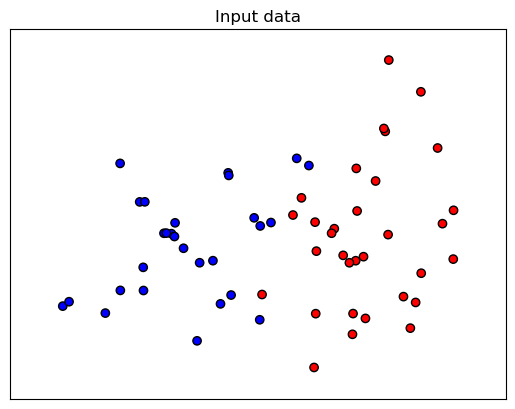

In [5]:
plot_dataset(X_train_scaled, y_train)

Let's now print all data (i.e., train and and test). The points in the test set are the most transparent that will be displayed.

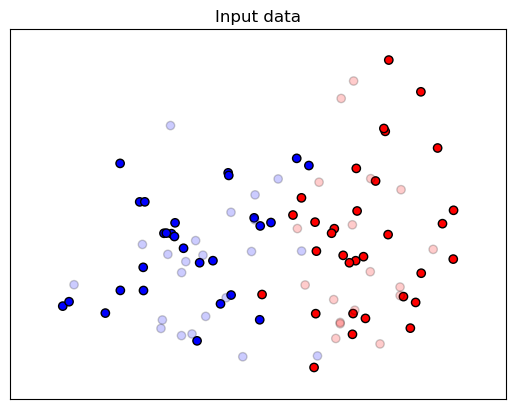

In [6]:
plot_dataset(X_train_scaled, y_train, X_test_scaled, y_test)

Now let's learn a perceptron, plot its decision boundary, and print the train error and the test error.

Training error:, 0.03333
Test error:, 0.05000


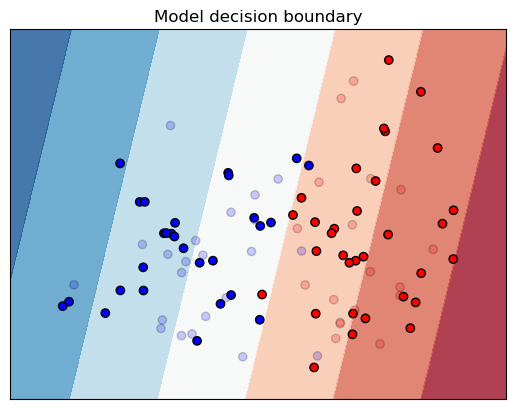

In [7]:
perceptron = Perceptron(random_state = 11)
perceptron.fit(X_train_scaled, y_train)

plot_model(perceptron, X_train_scaled, y_train, X_test_scaled, y_test)

print(f'Training error:, {(1.0 - perceptron.score(X_train_scaled, y_train)):.5f}')

print(f'Test error:, {(1.0 - perceptron.score(X_test_scaled, y_test)):.5f}')

Let's do the same for SVM.

Training error: 0.05000
Test error: 0.05000


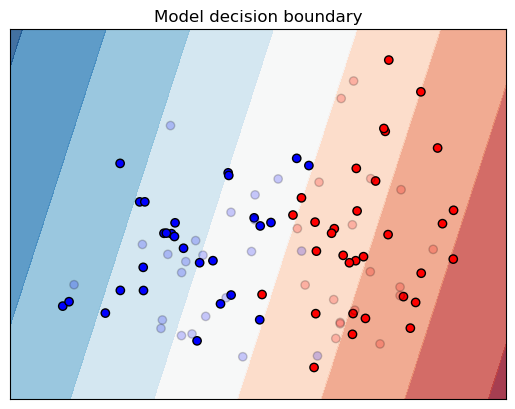

In [8]:
svm = SVC(kernel = "linear", C = 1)
svm.fit(X_train_scaled, y_train)

plot_model(svm, X_train_scaled, y_train, X_test_scaled, y_test)

print(f'Training error: {(1.0 - svm.score(X_train_scaled, y_train)):.5f}')
print(f'Test error: {(1.0 - svm.score(X_test_scaled, y_test)):.5f}')

Let's try with a NN.

Training error: 0.01667
Test error: 0.07500


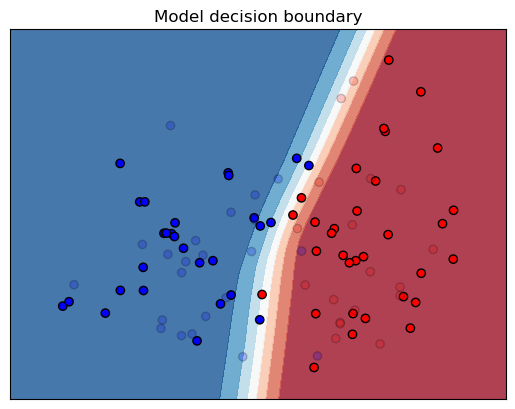

In [9]:
# -- one hidden layer with size= 100, activation function = ReLU (see documentation)
mlp = MLPClassifier(max_iter = 1000)
mlp.fit(X_train_scaled, y_train)

plot_model(mlp, X_train_scaled, y_train, X_test_scaled, y_test)

print(f'Training error: {(1.0 - mlp.score(X_train_scaled, y_train)):.5f}')
print(f'Test error: {(1.0 - mlp.score(X_test_scaled, y_test)):.5f}')

---

Let's try now with some more complex dataset.

In [10]:
X, y = make_moons(noise = 0.3, random_state = 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Let's plot the training data.

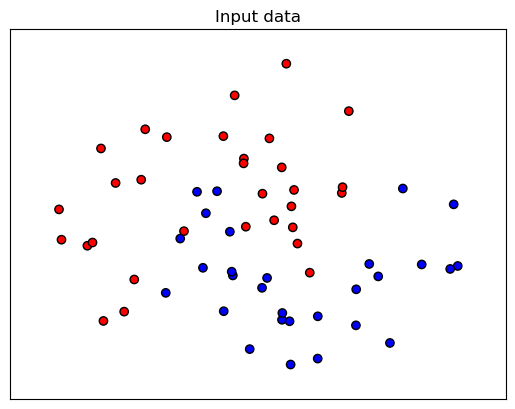

In [11]:
plot_dataset(X_train_scaled, y_train)

Let's plot all the data.

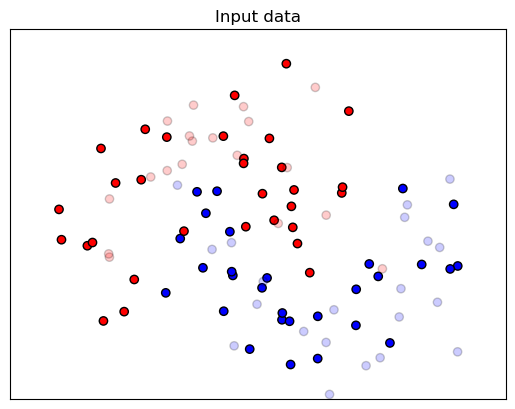

In [12]:
plot_dataset(X_train_scaled, y_train, X_test_scaled, y_test)

Let's run the perceptron.

Training error: 0.21667
Test error: 0.22500


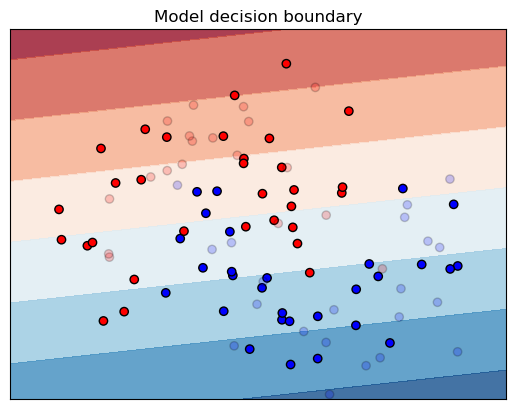

In [13]:
perceptron = Perceptron(random_state = 11)
perceptron.fit(X_train_scaled, y_train)

plot_model(perceptron, X_train_scaled, y_train, X_test_scaled, y_test)

print(f'Training error: {(1.0 - perceptron.score(X_train_scaled, y_train)):.5f}')
print(f'Test error: {(1.0 - perceptron.score(X_test_scaled, y_test)):.5f}')

Let's run the SVM

Training error: 0.18333
Test error: 0.10000


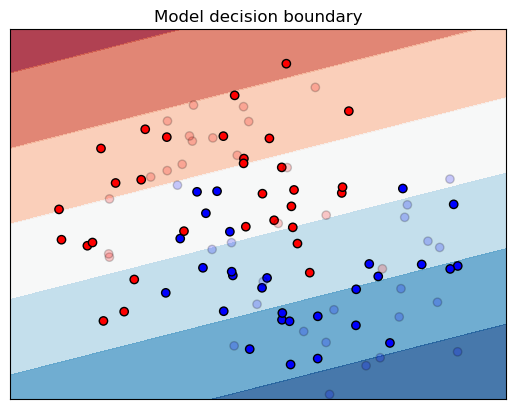

In [14]:
svm = SVC(kernel = "linear")
svm.fit(X_train, y_train)

plot_model(svm, X_train_scaled, y_train, X_test_scaled, y_test)

print(f'Training error: {(1.0 - svm.score(X_train_scaled, y_train)):.5f}')
print(f'Test error: {(1.0 - svm.score(X_test_scaled, y_test)):.5f}')

Let's try the NN

Training error: 0.01667
Test error: 0.05000


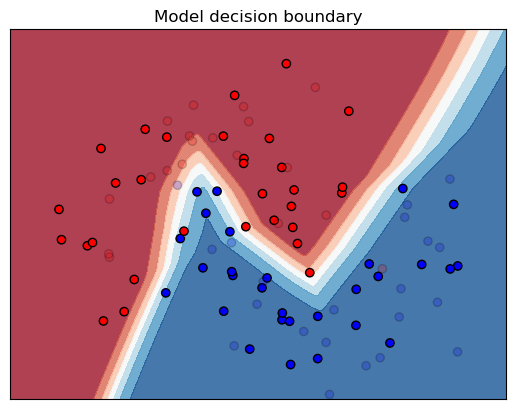

In [15]:
mlp = MLPClassifier(max_iter = 1500)
# -- Note that with max_iter = 1000 the model is not converging. (see 'tol' parameter). Try to re-train with max_iter = 1500
mlp.fit(X_train_scaled, y_train)

plot_model(mlp, X_train_scaled, y_train, X_test_scaled, y_test)

print(f'Training error: {(1.0 - mlp.score(X_train_scaled, y_train)):.5f}')
print(f'Test error: {(1.0 - mlp.score(X_test_scaled, y_test)):.5f}')

---

Another interesting dataset

In [16]:
X, y = make_circles(noise = 0.2, factor = 0.5, random_state = 1)

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.4, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Let's plot the training data.

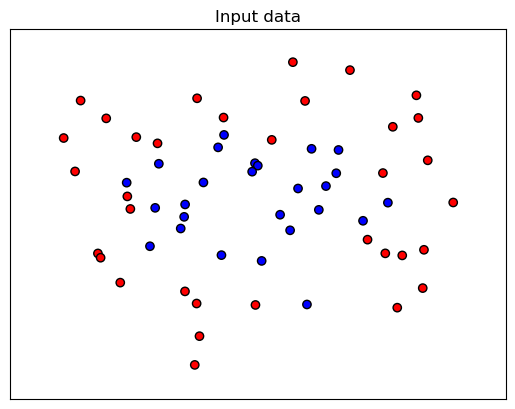

In [17]:
plot_dataset(X_train_scaled, y_train)

Let's plot all the data.

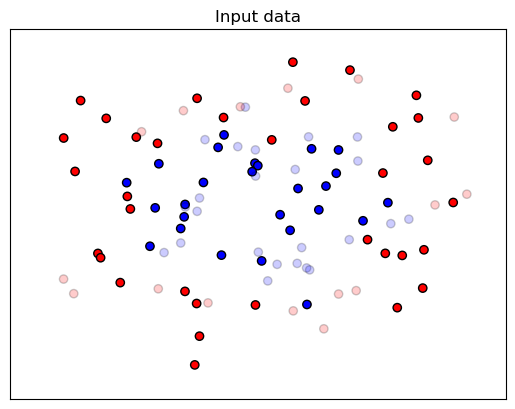

In [18]:
plot_dataset(X_train_scaled, y_train, X_test_scaled, y_test)

Let's run the perceptron

Training error: 0.50000
Test error: 0.47500


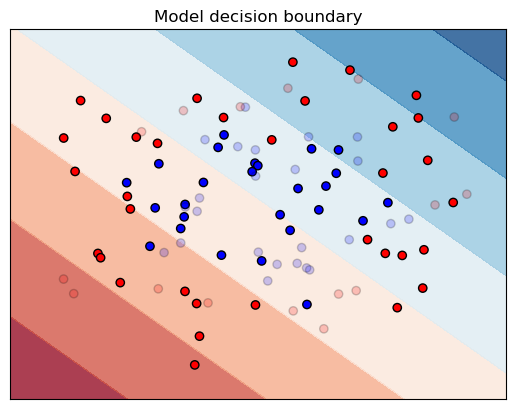

In [19]:
perceptron = Perceptron(random_state = 11)
perceptron.fit(X_train_scaled, y_train)

plot_model(perceptron, X_train_scaled, y_train, X_test_scaled, y_test)

print(f'Training error: {(1.0 - perceptron.score(X_train_scaled, y_train)):.5f}')
print(f'Test error: {(1.0 - perceptron.score(X_test_scaled, y_test)):.5f}')

Let's run the SVM

Training error: 0.43333
Test error: 0.60000


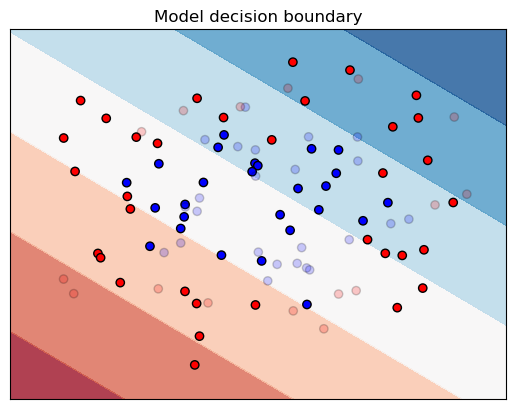

In [20]:
svm = SVC(kernel = "linear")
svm.fit(X_train, y_train)

plot_model(svm, X_train_scaled, y_train, X_test_scaled, y_test)

print(f'Training error: {(1.0 - svm.score(X_train_scaled, y_train)):.5f}')
print(f'Test error: {(1.0 - svm.score(X_test_scaled, y_test)):.5f}')

Let's run the NN

Training error: 0.03333
Test error: 0.12500


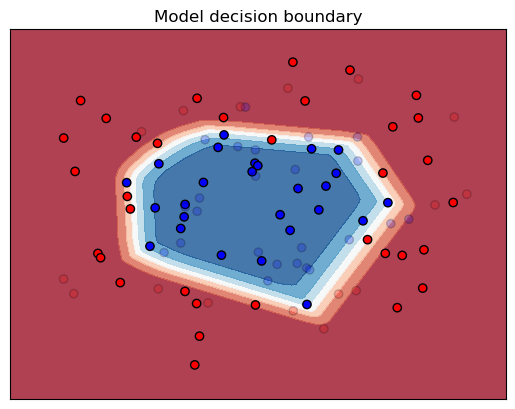

In [21]:
mlp = MLPClassifier(max_iter = 1000)
mlp.fit(X_train_scaled, y_train)

plot_model(mlp, X_train_scaled, y_train, X_test_scaled, y_test)

print(f'Training error: {(1.0 - mlp.score(X_train_scaled, y_train)):.5f}')
print(f'Test error: {(1.0 - mlp.score(X_test_scaled, y_test)):.5f}')

---

Let's now consider the blobs dataset considered in the last Lab.

In [22]:
# -- make_blobs dataset

# -- generate the dataset
X, y = make_blobs(n_samples = 1000, centers = 2, n_features = 2, center_box=(-7.5, 7.5), random_state = 37, cluster_std = 2.8)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# -- scale data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

Let's plot all the data.

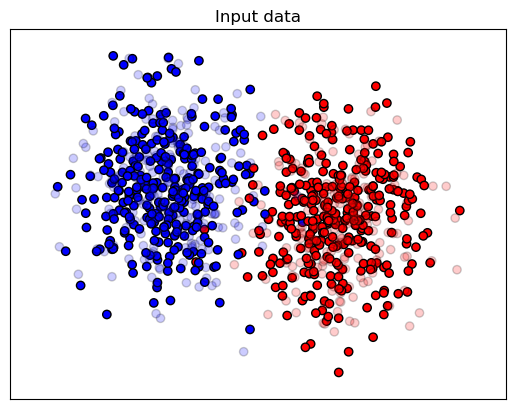

In [23]:
plot_dataset(X_train_scaled, y_train, X_test_scaled, y_test)

Training error: 0.02833
Test error: 0.03750


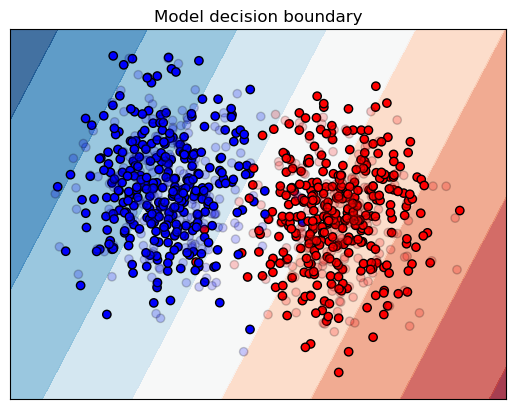

In [24]:
# -- perceptron
perceptron = Perceptron(random_state = 11)
perceptron.fit(X_train_scaled, y_train)

plot_model(perceptron, X_train_scaled, y_train, X_test_scaled, y_test)

print(f'Training error: {(1.0 - perceptron.score(X_train_scaled, y_train)):.5f}')
print(f'Test error: {(1.0 - perceptron.score(X_test_scaled, y_test)):.5f}')

Training error: 0.31667
Test error: 0.28500


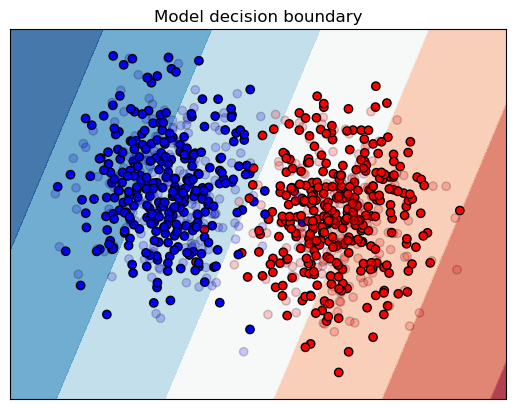

In [25]:
# -- svm
svm = SVC(kernel = "linear")
svm.fit(X_train, y_train)

plot_model(svm, X_train_scaled, y_train, X_test_scaled, y_test)

print(f'Training error: {(1.0 - svm.score(X_train_scaled, y_train)):.5f}')
print(f'Test error: {(1.0 - svm.score(X_test_scaled, y_test)):.5f}')

Training error: 0.02167
Test error: 0.01500


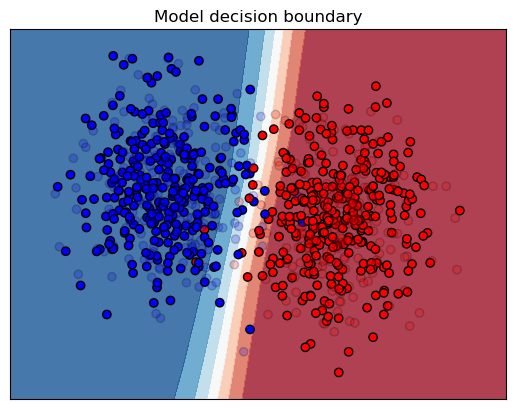

In [26]:
# -- NN (mlp)
mlp = MLPClassifier(max_iter = 1000)
mlp.fit(X_train_scaled, y_train)

plot_model(mlp, X_train_scaled, y_train, X_test_scaled, y_test)

print(f'Training error: {(1.0 - mlp.score(X_train_scaled, y_train)):.5f}')
print(f'Test error: {(1.0 - mlp.score(X_test_scaled, y_test)):.5f}')

# Second part: Regression on House Pricing Dataset
We consider a reduced version of a dataset containing house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

https://www.kaggle.com/harlfoxem/housesalesprediction

For each house we know 18 house features (e.g., number of bedrooms, number of bathrooms, etc.) plus its price, that is what we would like to predict.

In [27]:
# -- put here your ID_Number  (numero di matricola)
numero_di_matricola = 1

In [28]:
#import all packages needed
# %matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# -- avoid convergence warnings from sklearn library
import warnings
warnings.filterwarnings("ignore")

Load the data, remove data samples/points with missing values (NaN) and take a look at them.

In [29]:
# -- load the dataset
df = pd.read_csv('kc_house_data.csv', sep = ',')
# -- remove the data samples with missing values (NaN)
df = df.dropna()

In [30]:
# -- print the column names and the first 5 rows of the dataframe
print(df.columns)
print('\n')
print(df.head())

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            

Extract input and output data. We want to predict the price by using features other than id as input.

In [31]:
Data = df.values
# -- m = number of input samples
m = Data.shape[0]
print("Amount of data:",m)
Y = Data[:m, 2]
X = Data[:m, 3:]

# -- print shapes
print("X shape: ", X.shape)
print("Y shape: ", Y.shape)

Amount of data: 3164
X shape:  (3164, 18)
Y shape:  (3164,)


## Data Pre-Processing

We split the data into 3 parts: one will be used for training and choosing the parameters, one for choosing among different models, and one for testing. The part for training and choosing the parameters will consist of $2/3$ of all samples, the one for choosing among different models will consist of $1/6$ of all samples, while the other part consists of the remaining $1/6$-th of all samples.

In [32]:
# -- Split data into train (2/3 of samples), validation (1/6 of samples), and test data (the rest)
m_train = int(2/3*m)
m_val = int((m-m_train)/2)
m_test = m - m_train - m_val
print("Amount of data for training and deciding parameters:", m_train)
print("Amount of data for validation (choosing among different models):", m_val)
print("Amount of data for test:", m_test)

from sklearn.model_selection import train_test_split

X_train_and_val, X_test, Y_train_and_val, Y_test = train_test_split(X, Y, test_size = m_test/m, random_state = numero_di_matricola)
X_train, X_val, Y_train, Y_val = train_test_split(X_train_and_val, Y_train_and_val,
                                                  test_size = m_val/(m_train + m_val), random_state = numero_di_matricola)

Amount of data for training and deciding parameters: 2109
Amount of data for validation (choosing among different models): 527
Amount of data for test: 528


Let's standardize the data.

In [33]:
# -- Data pre-processing
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)
X_train_and_val_scaled = scaler.transform(X_train_and_val)

## Neural Networks
Let's start by learning a simple neural network with 1 hidden node.
Note: we are going to use the input parameter solver='lbfgs' and random_state=numero_di_matricola to fix the random seed (so results are reproducible).

We hereby define a function to train an MLPRegressor on the (already scaled) training data and (optionally) print its parameters at the end of the training.

In [34]:
# -- look at kwargs** in Python

In the function definition, a special syntax called `**kwargs` is used to pass a keyworded, variable-length argument list into the configuration settings of the `MLPRegressor` model. This syntax enables you to provide flexible and customizable parameters for the model. 

These keyword arguments allow you to specify various settings such as:
- **`hidden_layer_sizes`**, to define the number and size of hidden layers (e.g., `(1,)` for a single hidden layer with one neuron).
- **`solver`** (e.g., `'lbfgs'`).
- **`random_state`**

If you're unfamiliar with this syntax, refer to Python's documentation on `kwargs` for more details.


In [35]:
from sklearn.neural_network import MLPRegressor

def train_model(X_train, Y_train, X_val, Y_val, print_weights = True, **params):

    mlp_model = MLPRegressor(**params)
    mlp_model.fit(X_train, Y_train)

    # -- let's print the error (1 - R^2) on training data
    print(f'Training error: {(1.0 - mlp_model.score(X_train, Y_train)):.5f}')
    # -- let's print the error (1 - R^2) on validation data
    print(f'Validation error: {(1.0 - mlp_model.score(X_val, Y_val)):.5f}')

    if print_weights:

        weights = mlp_model.coefs_
        biases = mlp_model.intercepts_

        # -- let's print the coefficients of the model for the input nodes (but not the bias)
        print('\n--- Weights of NN ---')

        for i_layer, (w, b) in enumerate(zip(weights, biases)):
            print(f'\n# Layer {i_layer+1}')
            print(f'--- Weights, with shape {w.shape} ---')
            for i in range(w.shape[0]):
                for j in range(w.shape[1]):
                    print(f'w_({i+1}, {j+1})^({i_layer+1}): {w[i][j]:.3f}')

            print(f'--- Biases, with shape {b.shape} ---')
            for i in range(b.shape[0]):
                print(f'b_{i+1}: {b[i]:.3f}')

In [36]:
# -- let's define the model
# -- Look how to hidden_layer_sizes in the documentation
params = {'hidden_layer_sizes': (1, ),
          'solver' : 'lbfgs',
          'random_state' : numero_di_matricola}
train_model(X_train_scaled, Y_train, X_val_scaled, Y_val, **params)

Training error: 0.26393
Validation error: 0.30402

--- Weights of NN ---

# Layer 1
--- Weights, with shape (18, 1) ---
w_(1, 1)^(1): -150.327
w_(2, 1)^(1): 187.633
w_(3, 1)^(1): 365.428
w_(4, 1)^(1): -42.017
w_(5, 1)^(1): 2.966
w_(6, 1)^(1): 495.206
w_(7, 1)^(1): 204.905
w_(8, 1)^(1): 95.409
w_(9, 1)^(1): 569.324
w_(10, 1)^(1): 344.143
w_(11, 1)^(1): 114.379
w_(12, 1)^(1): -405.902
w_(13, 1)^(1): 26.248
w_(14, 1)^(1): -142.292
w_(15, 1)^(1): 418.394
w_(16, 1)^(1): -99.845
w_(17, 1)^(1): 102.207
w_(18, 1)^(1): -18.559
--- Biases, with shape (1,) ---
b_1: 2638.937

# Layer 2
--- Weights, with shape (1, 1) ---
w_(1, 1)^(2): 202.448
--- Biases, with shape (1,) ---
b_1: 1141.409


## Neural Networks vs Linear Models

Let's learn a linear model on the same data and compare the results with the simple NN above.

In [37]:
from sklearn import linear_model

LR = linear_model.LinearRegression()

LR.fit(X_train_scaled, Y_train)

# -- let's print the error (1 - R^2) on training data
print(f'Training error: {(1.0 - LR.score(X_train_scaled, Y_train)):.5f}')
# -- let's print the error (1 - R^2) on validation data
print(f'Validation error: {(1.0 - LR.score(X_val_scaled, Y_val)):.5f}')

print(f'\n--- Weights, with shape {LR.coef_.shape} ---\n{LR.coef_}')
print(f'\n--- Bias --- \n{LR.intercept_}')

Training error: 0.26536
Validation error: 0.31154

--- Weights, with shape (18,) ---
[-31303.71909156  35848.45081517  74506.78099995  -8012.41104949
    671.23713588 100205.53195594  41671.19028923  19507.84532115
 111331.50566184  69959.22677526  23468.73219785 -78236.93092911
   6535.34729956 -28197.21476235  83701.76486765 -21647.26671149
  22056.22833416  -2002.69401407]

--- Bias --- 
536831.9203413766


Is there a way to make a NN network learn a linear model?

Let's first check what is the activation function used by MLPRegressor...

In [38]:
# -- let's write the code to learn a linear model with NN: how?
params = {'hidden_layer_sizes': (1, ),
          'solver' : 'lbfgs',
          'random_state' : numero_di_matricola,
          'activation' : 'identity'
         }
train_model(X_train_scaled, Y_train, X_val_scaled, Y_val, **params)

Training error: 0.26536
Validation error: 0.31154

--- Weights of NN ---

# Layer 1
--- Weights, with shape (18, 1) ---
w_(1, 1)^(1): 51.551
w_(2, 1)^(1): -59.028
w_(3, 1)^(1): -122.969
w_(4, 1)^(1): 13.195
w_(5, 1)^(1): -1.107
w_(6, 1)^(1): -165.017
w_(7, 1)^(1): -68.625
w_(8, 1)^(1): -32.126
w_(9, 1)^(1): -183.340
w_(10, 1)^(1): -114.966
w_(11, 1)^(1): -38.516
w_(12, 1)^(1): 128.839
w_(13, 1)^(1): -10.762
w_(14, 1)^(1): 46.437
w_(15, 1)^(1): -137.839
w_(16, 1)^(1): 35.648
w_(17, 1)^(1): -36.322
w_(18, 1)^(1): 3.297
--- Biases, with shape (1,) ---
b_1: -883.447

# Layer 2
--- Weights, with shape (1, 1) ---
w_(1, 1)^(2): -607.243
--- Biases, with shape (1,) ---
b_1: 365.292


In [39]:
# -- Example of handmade computations: with null input vector:
# -- linear model output = bias ~ 536.831,9203
# -- NN: w_(1, 1)^(2) * b_1 + b_2 ~ 536.829,396
# -- why the above tiny difference? Because of l2 default regularization

Note that there is an $\ell_2$ regularization term in MLPRegressor. What about making it smaller?

In [40]:
# -- you can try to change alpha (e.g., huge value to see the model is forcing null vector w)
params = {'hidden_layer_sizes': (1, ),
          'solver' : 'lbfgs',
          'random_state' : numero_di_matricola,
          'activation' : 'identity',
          'alpha' : 1e-20
         }
train_model(X_train_scaled, Y_train, X_val_scaled, Y_val, **params)

Training error: 0.26536
Validation error: 0.31154

--- Weights of NN ---

# Layer 1
--- Weights, with shape (18, 1) ---
w_(1, 1)^(1): 51.551
w_(2, 1)^(1): -59.028
w_(3, 1)^(1): -122.969
w_(4, 1)^(1): 13.195
w_(5, 1)^(1): -1.107
w_(6, 1)^(1): -165.017
w_(7, 1)^(1): -68.625
w_(8, 1)^(1): -32.126
w_(9, 1)^(1): -183.340
w_(10, 1)^(1): -114.966
w_(11, 1)^(1): -38.516
w_(12, 1)^(1): 128.839
w_(13, 1)^(1): -10.762
w_(14, 1)^(1): 46.437
w_(15, 1)^(1): -137.839
w_(16, 1)^(1): 35.648
w_(17, 1)^(1): -36.322
w_(18, 1)^(1): 3.297
--- Biases, with shape (1,) ---
b_1: -883.447

# Layer 2
--- Weights, with shape (1, 1) ---
w_(1, 1)^(2): -607.243
--- Biases, with shape (1,) ---
b_1: 365.292


In [41]:
# -- with alpha = 1e-20: w_(1, 1)^(2) * b_1 + b_2 is 536.832,298621 (the difference is even closer,
# -- not perfectly the same due to rounding)

## More Complex NNs

Let's try more complex NN, for example increasing the number of nodes in the only hidden layer, or increasing the number of hidden layers.

Let's build a NN with 2 nodes in the only hidden layer

In [42]:
# -- let's build a NN with 2 nodes in the only hidden layer
params = {'hidden_layer_sizes': (2, ), 'solver' : 'lbfgs', 'random_state' : numero_di_matricola}
train_model(X_train_scaled, Y_train, X_val_scaled, Y_val, **params)

Training error: 0.18062
Validation error: 0.20740

--- Weights of NN ---

# Layer 1
--- Weights, with shape (18, 2) ---
w_(1, 1)^(1): 91.027
w_(1, 2)^(1): -33.275
w_(2, 1)^(1): 120.426
w_(2, 2)^(1): 39.341
w_(3, 1)^(1): 85.920
w_(3, 2)^(1): 72.986
w_(4, 1)^(1): -271.770
w_(4, 2)^(1): 28.298
w_(5, 1)^(1): -30.707
w_(5, 2)^(1): 17.827
w_(6, 1)^(1): 197.576
w_(6, 2)^(1): 25.889
w_(7, 1)^(1): 34.917
w_(7, 2)^(1): 37.557
w_(8, 1)^(1): 96.981
w_(8, 2)^(1): 25.686
w_(9, 1)^(1): 312.802
w_(9, 2)^(1): 132.752
w_(10, 1)^(1): 85.172
w_(10, 2)^(1): 68.793
w_(11, 1)^(1): 19.299
w_(11, 2)^(1): 23.330
w_(12, 1)^(1): -217.582
w_(12, 2)^(1): -81.109
w_(13, 1)^(1): -3.452
w_(13, 2)^(1): 20.170
w_(14, 1)^(1): -300.966
w_(14, 2)^(1): -26.399
w_(15, 1)^(1): 305.198
w_(15, 2)^(1): 144.630
w_(16, 1)^(1): -463.258
w_(16, 2)^(1): -16.430
w_(17, 1)^(1): 193.672
w_(17, 2)^(1): 53.022
w_(18, 1)^(1): -241.367
w_(18, 2)^(1): -11.182
--- Biases, with shape (2,) ---
b_1: -1049.807
b_2: 897.576

# Layer 2
--- Weights,

Let's build a NN with 5 nodes in the only hidden layer

In [43]:
# -- let's build a NN with 5 nodes in the only hidden layer
params = {'hidden_layer_sizes': (5, ), 'solver' : 'lbfgs', 'random_state' : numero_di_matricola}
train_model(X_train_scaled, Y_train, X_val_scaled, Y_val, **params)

Training error: 0.16308
Validation error: 0.21561

--- Weights of NN ---

# Layer 1
--- Weights, with shape (18, 5) ---
w_(1, 1)^(1): -181.039
w_(1, 2)^(1): 153.296
w_(1, 3)^(1): 5.400
w_(1, 4)^(1): 154.454
w_(1, 5)^(1): -35.168
w_(2, 1)^(1): 264.007
w_(2, 2)^(1): 394.815
w_(2, 3)^(1): 161.759
w_(2, 4)^(1): 127.775
w_(2, 5)^(1): 13.261
w_(3, 1)^(1): -381.662
w_(3, 2)^(1): 326.013
w_(3, 3)^(1): 273.877
w_(3, 4)^(1): -296.390
w_(3, 5)^(1): 271.664
w_(4, 1)^(1): -146.156
w_(4, 2)^(1): -34.558
w_(4, 3)^(1): -717.748
w_(4, 4)^(1): 89.333
w_(4, 5)^(1): 78.053
w_(5, 1)^(1): 822.507
w_(5, 2)^(1): -920.635
w_(5, 3)^(1): 295.296
w_(5, 4)^(1): -36.850
w_(5, 5)^(1): -109.294
w_(6, 1)^(1): -369.540
w_(6, 2)^(1): 645.083
w_(6, 3)^(1): 505.692
w_(6, 4)^(1): -495.787
w_(6, 5)^(1): -83.499
w_(7, 1)^(1): -525.679
w_(7, 2)^(1): 635.210
w_(7, 3)^(1): -17.272
w_(7, 4)^(1): -454.095
w_(7, 5)^(1): 188.471
w_(8, 1)^(1): 94.150
w_(8, 2)^(1): 737.331
w_(8, 3)^(1): 155.890
w_(8, 4)^(1): -34.072
w_(8, 5)^(1): 21.

Let's build a NN with 10 nodes in the only hidden layer

In [44]:
# -- let's build a NN with 10 nodes in the only hidden layer
params = {'hidden_layer_sizes': (10, ), 'solver' : 'lbfgs', 'random_state' : numero_di_matricola}
train_model(X_train_scaled, Y_train, X_val_scaled, Y_val, **params)

Training error: 0.12000
Validation error: 0.31650

--- Weights of NN ---

# Layer 1
--- Weights, with shape (18, 10) ---
w_(1, 1)^(1): 140.711
w_(1, 2)^(1): -4.881
w_(1, 3)^(1): -86.637
w_(1, 4)^(1): 76.510
w_(1, 5)^(1): 77.478
w_(1, 6)^(1): -65.111
w_(1, 7)^(1): 33.551
w_(1, 8)^(1): -4.687
w_(1, 9)^(1): -59.777
w_(1, 10)^(1): 182.882
w_(2, 1)^(1): -14.446
w_(2, 2)^(1): -69.351
w_(2, 3)^(1): 123.389
w_(2, 4)^(1): 72.632
w_(2, 5)^(1): -94.362
w_(2, 6)^(1): 447.200
w_(2, 7)^(1): 340.999
w_(2, 8)^(1): -62.770
w_(2, 9)^(1): 115.469
w_(2, 10)^(1): -160.412
w_(3, 1)^(1): -89.975
w_(3, 2)^(1): 60.282
w_(3, 3)^(1): 253.157
w_(3, 4)^(1): 29.709
w_(3, 5)^(1): -206.283
w_(3, 6)^(1): 190.223
w_(3, 7)^(1): -225.811
w_(3, 8)^(1): 16.296
w_(3, 9)^(1): 106.878
w_(3, 10)^(1): -179.277
w_(4, 1)^(1): 195.994
w_(4, 2)^(1): 54.376
w_(4, 3)^(1): 82.254
w_(4, 4)^(1): -244.940
w_(4, 5)^(1): -90.060
w_(4, 6)^(1): -15.642
w_(4, 7)^(1): -203.668
w_(4, 8)^(1): -53.493
w_(4, 9)^(1): -42.902
w_(4, 10)^(1): -550.993

Let's build a NN with 100 nodes in the only hidden layer. Note that this is the default!

In [45]:
# -- let's build a NN with 100 nodes in the only hidden layer
params = {'hidden_layer_sizes': (100, ), 'solver' : 'lbfgs', 'random_state' : numero_di_matricola}
train_model(X_train_scaled, Y_train, X_val_scaled, Y_val, print_weights=False, **params)

Training error: 0.03167
Validation error: 0.45533


Let's try 2 layers, 1 node each

In [46]:
# -- let's build a NN with 2 hidden layers each with a node
params = {'hidden_layer_sizes': (1, 1), 'solver' : 'lbfgs', 'random_state' : numero_di_matricola}
train_model(X_train_scaled, Y_train, X_val_scaled, Y_val, **params)

Training error: 0.23867
Validation error: 0.27349

--- Weights of NN ---

# Layer 1
--- Weights, with shape (18, 1) ---
w_(1, 1)^(1): -46.754
w_(2, 1)^(1): 99.617
w_(3, 1)^(1): 171.755
w_(4, 1)^(1): -44.499
w_(5, 1)^(1): -20.012
w_(6, 1)^(1): 209.198
w_(7, 1)^(1): 74.558
w_(8, 1)^(1): 62.915
w_(9, 1)^(1): 321.548
w_(10, 1)^(1): 167.730
w_(11, 1)^(1): 43.500
w_(12, 1)^(1): -206.062
w_(13, 1)^(1): 4.921
w_(14, 1)^(1): -152.370
w_(15, 1)^(1): 301.395
w_(16, 1)^(1): -204.474
w_(17, 1)^(1): 103.731
w_(18, 1)^(1): -39.335
--- Biases, with shape (1,) ---
b_1: 205.072

# Layer 2
--- Weights, with shape (1, 1) ---
w_(1, 1)^(2): 1.117
--- Biases, with shape (1,) ---
b_1: 739.550

# Layer 3
--- Weights, with shape (1, 1) ---
w_(1, 1)^(3): 438.732
--- Biases, with shape (1,) ---
b_1: 464.094


Let's try 2 layers, 2 nodes each

In [47]:
# -- let's build a NN with 2 hidden layers each with two nodes
params = {'hidden_layer_sizes': (2, 2), 'solver' : 'lbfgs', 'random_state' : numero_di_matricola}
train_model(X_train_scaled, Y_train, X_val_scaled, Y_val, **params)

Training error: 0.21325
Validation error: 0.26996

--- Weights of NN ---

# Layer 1
--- Weights, with shape (18, 2) ---
w_(1, 1)^(1): -4.302
w_(1, 2)^(1): 2.295
w_(2, 1)^(1): 10.391
w_(2, 2)^(1): -6.552
w_(3, 1)^(1): 21.270
w_(3, 2)^(1): -24.373
w_(4, 1)^(1): -8.524
w_(4, 2)^(1): 11.964
w_(5, 1)^(1): -4.108
w_(5, 2)^(1): 13.230
w_(6, 1)^(1): 21.376
w_(6, 2)^(1): -14.812
w_(7, 1)^(1): 9.325
w_(7, 2)^(1): -9.772
w_(8, 1)^(1): 7.774
w_(8, 2)^(1): -6.904
w_(9, 1)^(1): 36.037
w_(9, 2)^(1): -31.548
w_(10, 1)^(1): 21.026
w_(10, 2)^(1): -24.824
w_(11, 1)^(1): 5.182
w_(11, 2)^(1): -3.346
w_(12, 1)^(1): -26.872
w_(12, 2)^(1): 30.262
w_(13, 1)^(1): 1.126
w_(13, 2)^(1): 1.532
w_(14, 1)^(1): -15.172
w_(14, 2)^(1): 17.534
w_(15, 1)^(1): 25.939
w_(15, 2)^(1): -9.881
w_(16, 1)^(1): -18.772
w_(16, 2)^(1): 22.076
w_(17, 1)^(1): 6.227
w_(17, 2)^(1): 5.048
w_(18, 1)^(1): -2.966
w_(18, 2)^(1): 6.288
--- Biases, with shape (2,) ---
b_1: 78.119
b_2: 62.980

# Layer 2
--- Weights, with shape (2, 2) ---
w_(1, 

Try other architectures! 

In [48]:
# -- let's build a NN with 2 hidden layers each with 10 nodes
params = {'hidden_layer_sizes': (10, 10), 'solver' : 'lbfgs', 'random_state' : numero_di_matricola}
train_model(X_train_scaled, Y_train, X_val_scaled, Y_val, **params)

Training error: 0.07503
Validation error: 0.30269

--- Weights of NN ---

# Layer 1
--- Weights, with shape (18, 10) ---
w_(1, 1)^(1): 8.386
w_(1, 2)^(1): 6.938
w_(1, 3)^(1): 8.020
w_(1, 4)^(1): 0.567
w_(1, 5)^(1): -7.509
w_(1, 6)^(1): -26.473
w_(1, 7)^(1): -7.380
w_(1, 8)^(1): -14.518
w_(1, 9)^(1): -1.329
w_(1, 10)^(1): 8.280
w_(2, 1)^(1): -3.789
w_(2, 2)^(1): 29.950
w_(2, 3)^(1): 22.803
w_(2, 4)^(1): -1.690
w_(2, 5)^(1): -6.138
w_(2, 6)^(1): 36.434
w_(2, 7)^(1): -20.943
w_(2, 8)^(1): 9.773
w_(2, 9)^(1): -15.397
w_(2, 10)^(1): -5.907
w_(3, 1)^(1): -26.101
w_(3, 2)^(1): 13.377
w_(3, 3)^(1): 7.249
w_(3, 4)^(1): -12.543
w_(3, 5)^(1): -13.772
w_(3, 6)^(1): 9.186
w_(3, 7)^(1): 5.155
w_(3, 8)^(1): 36.063
w_(3, 9)^(1): -39.581
w_(3, 10)^(1): -8.109
w_(4, 1)^(1): -0.688
w_(4, 2)^(1): 0.835
w_(4, 3)^(1): 14.678
w_(4, 4)^(1): -15.866
w_(4, 5)^(1): -20.757
w_(4, 6)^(1): -1.941
w_(4, 7)^(1): -6.959
w_(4, 8)^(1): -3.349
w_(4, 9)^(1): 11.798
w_(4, 10)^(1): 1.069
w_(5, 1)^(1): -42.584
w_(5, 2)^(1): 

In [49]:
# -- let's build a NN with 2 hidden layers each with 100 nodes
params = {'hidden_layer_sizes': (100, 100), 'solver' : 'lbfgs', 'random_state' : numero_di_matricola}
train_model(X_train_scaled, Y_train, X_val_scaled, Y_val, print_weights=False, **params)

Training error: 0.02284
Validation error: 0.32801


How can we find the best architecture?

### $k$-Fold Cross Validation

Let's try 5-fold cross-validation with number of nodes in the hidden layer between 1 and 20. Note that we use train and validation data together, since we are doing cross-validation.

Note: you can also try to change the maximum amount of iterations to see what happens (see documentation for max_iter parameter)

In [50]:
from sklearn.model_selection import KFold
from itertools import product


def k_fold_cross_validation(X_train, Y_train, random_state, num_folds = 5):

    # -- grid of hyperparams
    param_grid = {'hidden_layer_sizes': [i for i in range(1, 21)],
                  'activation': ['relu'],
                  'solver': ['lbfgs'],
                  'random_state': [random_state],
                  'max_iter': [150, 175, 200]
                 }

    param_list = [
    {'hidden_layer_sizes': hls, 'activation': act, 'solver': solv, 'random_state': rs, 'max_iter': mit}
    for hls, act, solv, rs, mit in product(
        param_grid['hidden_layer_sizes'],
        param_grid['activation'],
        param_grid['solver'],
        param_grid['random_state'],
        param_grid['max_iter']
    )
    ]

    err_train_kfold = np.zeros(len(param_list),)
    err_val_kfold = np.zeros(len(param_list),)

    # print('Params for model selection:', param_list)

    kf = KFold(n_splits = num_folds)


    # -- perform kfold validation for model selection (k = 5)
    for i, params in enumerate(param_list):

        print(f'#{i+1}  {params}...')
        mlp_model = MLPRegressor(**params)

        for train_index, validation_index in kf.split(X_train):

            X_train_kfold, X_val_kfold = X_train[train_index], X_train[validation_index]
            Y_train_kfold, Y_val_kfold = Y_train[train_index], Y_train[validation_index]

            # -- data scaling: standardize features with respect to the current folds
            scaler_kfold = preprocessing.StandardScaler().fit(X_train_kfold)
            X_train_kfold_scaled = scaler_kfold.transform(X_train_kfold)
            X_val_kfold_scaled = scaler_kfold.transform(X_val_kfold)

            # -- learn the model using the training data from the k-fold
            mlp_model.fit(X_train_kfold_scaled, Y_train_kfold)

            # -- incremental mean
            err_train_kfold[i] += (1 - mlp_model.score(X_train_kfold_scaled, Y_train_kfold))
            err_val_kfold[i] += (1 - mlp_model.score(X_val_kfold_scaled, Y_val_kfold))
        print("train cv error", err_train_kfold[i] / num_folds)
        print("val cv error", err_val_kfold[i] / num_folds)
        print()


    # -- compute the mean => estimate of validation losses and errors for each lam
    err_train_kfold /= num_folds
    err_val_kfold /= num_folds

    # -- choose the regularization parameter that minimizes the loss
    print('\n---\n')
    best_param = param_list[np.argmin(err_val_kfold)]
    print('Best value of the parameters:', best_param)
    print('Min validation error:', np.min(err_val_kfold))

    return best_param

In [51]:
# -- obtain the best paramaters by running k_fold_cross_validation on training data
best_param = k_fold_cross_validation(X_train_scaled, Y_train, random_state = numero_di_matricola)

#1  {'hidden_layer_sizes': 1, 'activation': 'relu', 'solver': 'lbfgs', 'random_state': 1, 'max_iter': 150}...
train cv error 0.26407115800950987
val cv error 0.2817817492247915

#2  {'hidden_layer_sizes': 1, 'activation': 'relu', 'solver': 'lbfgs', 'random_state': 1, 'max_iter': 175}...
train cv error 0.26403365397432205
val cv error 0.28188492468004267

#3  {'hidden_layer_sizes': 1, 'activation': 'relu', 'solver': 'lbfgs', 'random_state': 1, 'max_iter': 200}...
train cv error 0.2633141805773371
val cv error 0.28154926410946457

#4  {'hidden_layer_sizes': 2, 'activation': 'relu', 'solver': 'lbfgs', 'random_state': 1, 'max_iter': 150}...
train cv error 0.17007276929131535
val cv error 0.22740475827785733

#5  {'hidden_layer_sizes': 2, 'activation': 'relu', 'solver': 'lbfgs', 'random_state': 1, 'max_iter': 175}...
train cv error 0.1700685351950858
val cv error 0.22749600848571

#6  {'hidden_layer_sizes': 2, 'activation': 'relu', 'solver': 'lbfgs', 'random_state': 1, 'max_iter': 200}...
t

Note that with a smaller number of iterations we had a larger error on training set but a smaller error on validation data -> "early stopping is a form of regularization"

In [52]:
# -- let's train the model with best_param on train and validation
final_model = MLPRegressor(**best_param)
final_model.fit(X_train_and_val_scaled, Y_train_and_val)
training_error = 1.0 - final_model.score(X_train_and_val_scaled, Y_train_and_val)
print("Training error of best model: ", training_error)

Training error of best model:  0.09454277989607651


In [53]:
# -- let's compute the test error
test_error = 1.0 - final_model.score(X_test_scaled, Y_test)
print("Test error of best model: ", test_error)

Test error of best model:  0.16178459462237949
